In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import joblib  # 用于保存和加载模型


In [59]:
# 1. 加载真实数据（替换为你的数据文件路径）
try:
    # 支持CSV或Excel格式
    # data = pd.read_csv("drone_flight_data.csv")  # 方法1：从CSV加载
    data = pd.read_excel("E:\张岐奕1\EPI\github\Python\\random forest\\random.xlsx")  # 方法2：从Excel加载
except FileNotFoundError:
    print("错误：未找到数据文件！请检查文件路径")
    exit()

# 检查数据是否包含必需的列



<>:5: SyntaxWarning: invalid escape sequence '\E'
<>:5: SyntaxWarning: invalid escape sequence '\E'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_30232\1430494551.py:5: SyntaxWarning: invalid escape sequence '\E'
  data = pd.read_excel("E:\张岐奕1\EPI\github\Python\\random forest\\random.xlsx")  # 方法2：从Excel加载


In [60]:
data

,temperature,altitude,environment_type,flight_time
0,-15,0,urban,34.96
1,-10,0,urban,38.64
2,-5,0,urban,42.32
3,0,0,urban,46.00
4,5,0,urban,46.00
...,...,...,...,...
247,20,3000,grassland,28.90
248,25,3000,grassland,38.00
249,30,3000,grassland,37.00
250,35,3000,grassland,35.90


In [61]:
# 2. 数据预处理
print("\n数据预览（前5行）：")
print(data.head())

# 处理缺失值（如果有）
if data.isnull().sum().any():
    print("\n发现缺失值：")
    print(data.isnull().sum())
    data = data.dropna()  # 简单处理：删除包含缺失值的行
    print("已删除包含缺失值的行")

# 分离特征和目标变量
X = data[['temperature', 'altitude', 'environment_type']]
y = data['flight_time']



数据预览（前5行）：
   temperature  altitude environment_type  flight_time
0          -15         0            urban        34.96
1          -10         0            urban        38.64
2           -5         0            urban        42.32
3            0         0            urban        46.00
4            5         0            urban        46.00


In [62]:
# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)
print(f"\n数据集划分：训练集 {X_train.shape[0]} 条，测试集 {X_test.shape[0]} 条")



数据集划分：训练集 201 条，测试集 51 条


In [63]:
from sklearn.compose import ColumnTransformer
# 4. 创建预处理和建模管道
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['temperature', 'altitude']),  # 数值特征直接保留
        ('cat', OneHotEncoder(), ['environment_type'])  # 分类变量进行独热编码
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1  # 使用所有CPU核心加速训练
    ))
])


In [64]:
# 5. 训练模型
print("\n开始训练模型...")
model.fit(X_train, y_train)
print("模型训练完成！")


开始训练模型...
模型训练完成！


In [65]:
# 6. 模型评估
y_pred = model.predict(X_test)

print("\n模型评估指标：")
print(f"- 平均绝对误差(MAE): {mean_absolute_error(y_test, y_pred):.2f} 分钟")
print(f"- 均方误差(MSE): {mean_squared_error(y_test, y_pred):.2f}")
print(f"- 均方根误差(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.2f} 分钟")
print(f"- R²分数: {r2_score(y_test, y_pred):.2f}")



模型评估指标：
- 平均绝对误差(MAE): 0.73 分钟
- 均方误差(MSE): 0.86
- 均方根误差(RMSE): 0.92 分钟
- R²分数: 0.98



特征重要性排序：
temperature: 0.5733
environment_type_grassland: 0.2421
altitude: 0.1626
environment_type_urban: 0.0121
environment_type_forest: 0.0099

已保存特征重要性图表：feature_importance.png


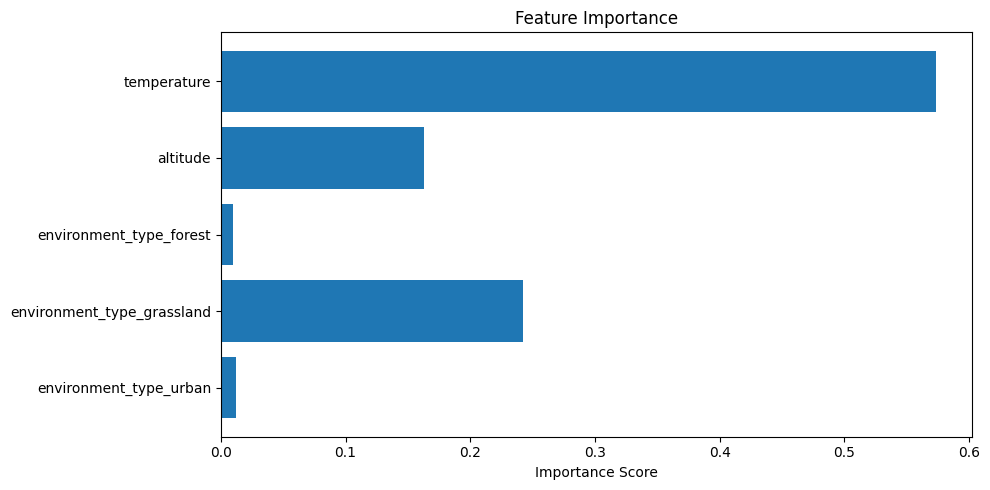

In [66]:
# 7. 特征重要性分析
# 获取特征名称（包括独热编码后的类别特征）
numeric_features = ['temperature', 'altitude']
categorical_features = model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['environment_type'])
feature_names = numeric_features + list(categorical_features)

importances = model.named_steps['regressor'].feature_importances_

print("\n特征重要性排序：")
for name, importance in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(f"{name}: {importance:.4f}")
    # 可视化特征重要性
plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # 重要性从高到低显示
plt.tight_layout()
plt.savefig("feature_importance.png")  # 保存图表
print("\n已保存特征重要性图表：feature_importance.png")


In [67]:
# 8. 保存模型
joblib.dump(model, "drone_flight_time_predictor.pkl")
print("\n已保存训练好的模型：drone_flight_time_predictor.pkl")



已保存训练好的模型：drone_flight_time_predictor.pkl


In [ ]:
#  # 9. 使用模型进行新数据预测
# new_data = pd.DataFrame({
#      'temperature': [-15,-10,-5,0,5,10,15,20,25,30,35,40],  # 温度(℃)
#      'altitude': [0,500,1000,1500,2000, 2500,3000],  # 海拔(m)
#      'environment_type': ['urban', 'forest', 'grassland']  # 环境类型
#  })
# predicted_times = model.predict(new_data)
# print("\n新数据预测结果：")
# for i, row in new_data.iterrows():
#      print(f"情况{i+1}: 温度={row['temperature']}℃, 海拔={row['altitude']}m, 环境={row['environment_type']} → 预测续航: {predicted_times[i]:.1f} 分钟")

#  # 显示图表（如果是在Jupyter Notebook中运行）
# plt.show()

ValueError: All arrays must be of the same length

In [70]:
from itertools import product
# 9. 使用模型进行新数据预测
temperatures = [-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40]
altitudes = [0, 500, 1000, 1500, 2000, 2500, 3000]
environments = ['urban', 'forest', 'grassland']

# 生成所有组合
combinations = list(product(temperatures, altitudes, environments))
new_data = pd.DataFrame(combinations, columns=['temperature', 'altitude', 'environment_type'])

# 预测并打印结果
predicted_times = model.predict(new_data)
print("\n新数据预测结果（前10条）：")
for i in range(10):  # 仅显示前10条结果
    row = new_data.iloc[i]
    print(f"组合{i+1}: 温度={row['temperature']}℃, 海拔={row['altitude']}m, 环境={row['environment_type']} → 预测续航: {predicted_times[i]:.1f} 分钟")

# 保存所有预测结果到CSV（可选）
results = new_data.copy()
results['predicted_flight_time'] = predicted_times
results.to_csv("all_predictions.csv", index=False)
print("\n已保存所有预测结果到: all_predictions.csv")


新数据预测结果（前10条）：
组合1: 温度=-15℃, 海拔=0m, 环境=urban → 预测续航: 33.8 分钟
组合2: 温度=-15℃, 海拔=0m, 环境=forest → 预测续航: 28.7 分钟
组合3: 温度=-15℃, 海拔=0m, 环境=grassland → 预测续航: 20.6 分钟
组合4: 温度=-15℃, 海拔=500m, 环境=urban → 预测续航: 32.9 分钟
组合5: 温度=-15℃, 海拔=500m, 环境=forest → 预测续航: 28.8 分钟
组合6: 温度=-15℃, 海拔=500m, 环境=grassland → 预测续航: 20.4 分钟
组合7: 温度=-15℃, 海拔=1000m, 环境=urban → 预测续航: 30.7 分钟
组合8: 温度=-15℃, 海拔=1000m, 环境=forest → 预测续航: 26.6 分钟
组合9: 温度=-15℃, 海拔=1000m, 环境=grassland → 预测续航: 19.8 分钟
组合10: 温度=-15℃, 海拔=1500m, 环境=urban → 预测续航: 28.8 分钟

已保存所有预测结果到: all_predictions.csv


In [ ]:
# # 原始数据（长度不一致）
# new_data = {
#     'temperature': [-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40],  # 12个值
#     'altitude': [0, 500, 1000, 1500, 2000, 2500, 3000],               # 7个值
#     'environment_type': ['urban', 'forest', 'grassland']               # 3个值
# }

# # 用NaN填充较短列，使所有列长度一致（以最长列为准）
# max_length = max(len(v) for v in new_data.values())
# for key in new_data:
#     if len(new_data[key]) < max_length:
#         new_data[key] += [np.nan] * (max_length - len(new_data[key]))

# # 转换为DataFrame
# new_data = pd.DataFrame(new_data)

# # 打印检查
# print("填充后的新数据：")
# print(new_data)

# # 预测（注意：NaN值会导致预测失败，需先删除或填充）
# valid_data = new_data.dropna()  # 删除包含NaN的行
# if not valid_data.empty:
#     predicted_times = model.predict(valid_data)
#     print("\n有效数据预测结果：")
#     for i, row in valid_data.iterrows():
#         print(f"温度={row['temperature']}℃, 海拔={row['altitude']}m, 环境={row['environment_type']} → 预测续航: {predicted_times[i]:.1f} 分钟")
# else:
#     print("\n警告：所有数据均包含NaN，无法预测！")

填充后的新数据：
    temperature  altitude environment_type
0           -15       0.0            urban
1           -10     500.0           forest
2            -5    1000.0        grassland
3             0    1500.0              NaN
4             5    2000.0              NaN
5            10    2500.0              NaN
6            15    3000.0              NaN
7            20       NaN              NaN
8            25       NaN              NaN
9            30       NaN              NaN
10           35       NaN              NaN
11           40       NaN              NaN

有效数据预测结果：
温度=-15℃, 海拔=0.0m, 环境=urban → 预测续航: 33.8 分钟
温度=-10℃, 海拔=500.0m, 环境=forest → 预测续航: 33.6 分钟
温度=-5℃, 海拔=1000.0m, 环境=grassland → 预测续航: 24.0 分钟
